# Diabetes Prediction

In [37]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

import pickle ## for dump the model 

In [9]:
df = pd.read_csv('diabetes_data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df['Outcome'].value_counts()

# conclusion -> binary output 

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
 # [Glucose	BloodPressure	SkinThickness	Insulin	BMI ] -> can not be zero 
 # we need to replace these zero by mean 

In [14]:
colums = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in colums:
    df[i] = df[i].replace(0 ,df[i].mean())
    

In [15]:
df.describe()

# now 0 value replaced by mean value 
# df['Glucose'].replace(0,df['Glucose'].mean()) -> erom alada vabeo kora jai 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# check missing value 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# duplicates 
df[df.duplicated()]

# there is no duplicated value 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


<AxesSubplot: >

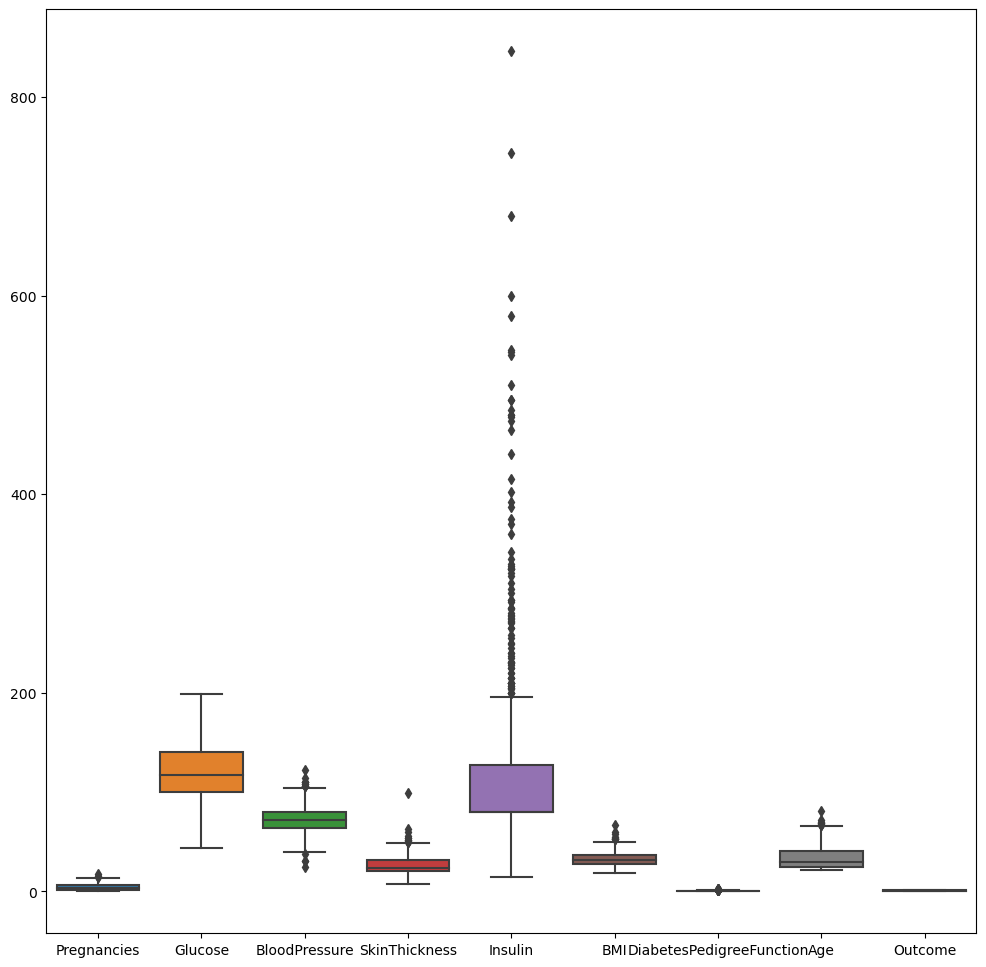

In [24]:
# check outliers 
plt.figure(figsize=(12,12))
sns.boxplot(data=df)

# CONCLUSION -> OUTLIERS IS PRESENT -> SO WE NEED TO SCALE DOWN THE DATA 

## step 1-> separate the dataframe 

In [25]:
X = df.iloc[: , :-1]
Y = df.iloc[:,-1]

In [28]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [29]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## step 2-> train test split 

In [30]:
from sklearn.model_selection import train_test_split

# split the data 
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=0)


In [32]:
x_train.shape, y_train.shape

((576, 8), (576,))

## step3 -> standerd scale down  of X

In [38]:
from sklearn.preprocessing import StandardScaler

# object create 
scaler = StandardScaler()

# fitand tranform 
x_train_scaled = scaler.fit_transform(x_train)

# only transform to tesst input 
x_test_scaled = scaler.transform(x_test)

# dump the model 
pickle.dump(scaler,open('scaler.pkl','wb'))

In [34]:
x_test_scaled

array([[-0.82986389,  2.56591881,  0.27922165, ...,  1.46903995,
         2.78665365, -0.96584853],
       [-0.53768687, -0.49968691,  0.11084355, ...,  0.13573925,
        -0.19434743, -0.88246592],
       [ 0.04666716, -1.53266275, -0.89942504, ...,  0.19308552,
        -0.23349189, -0.71570071],
       ...,
       [-0.82986389, -0.43304331, -1.06780314, ..., -1.03985921,
         1.4406865 , -1.04923114],
       [-0.24550986,  0.20007091,  0.44759974, ..., -1.65633158,
        -0.60385869,  1.7857775 ],
       [ 0.33884418, -1.13280114,  0.44759974, ..., -0.72445475,
        -0.63396981,  0.28489057]])

In [36]:
x_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

## Logistic Regression 

In [40]:
from sklearn.linear_model import LogisticRegression

# model creation 
reg = LogisticRegression()

reg

LogisticRegression()

## Hyperparameter Tuning 

In [42]:
from sklearn.model_selection import GridSearchCV

# parametr 
parameters = {'solver' :['lbfgs','liblinear','newton-cg','newton-cholesky','sag'],
              'C'      :[1,2,3],
              'penalty':['l1','l2','elasticnet', None]
             }

In [43]:
# object 
clf = GridSearchCV(reg, param_grid=parameters,cv=10)

# data ke traine and validation datai split korbe 
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag']})

In [44]:
clf.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [45]:
# now predict the data with these parameter 
regressor = LogisticRegression(C=1,penalty='l2',solver='liblinear')

# traine the model 
regressor.fit(x_train_scaled,y_train)

LogisticRegression(C=1, solver='liblinear')

In [46]:
y_test_pred = regressor.predict(x_test_scaled)
y_test_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

## Now check confusion matrix , accuracy 

In [48]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

# confusion matrix 
c_m= confusion_matrix(y_test , y_test_pred)
c_m

array([[117,  13],
       [ 26,  36]])

In [49]:
accuracy_score(y_test , y_test_pred)

0.796875

In [50]:
TP =c_m[0][0] 
TN =c_m[1][1]
FP =c_m[0][1]
FN = c_m[1][0]

In [51]:
precission = TP /(TP+FP)
precission

0.9

In [52]:
recall = TP /(TP+FN)
recall

0.8181818181818182